# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
#Podijela skupa podataka na podskup za trening i test
X_train, X_test, y_train, y_test = train_test_split(data[['TV', 'radio', 'newspaper']], data['sales'], test_size=0.3, random_state=42)

#Model linearne regresije
model_lin_reg = LinearRegression()

model_lin_reg.fit(X_train, y_train) #Pomoću metode .fit() obučavamo model linearne regresije na podacima za treniranje tako ad procjenjuje koeficijente za svaku značajku
#Nakon što se model istrenira -> može se koristiti za predviđanje novih vrijednosti.

#MSE - mean squared error
train_predictions = model_lin_reg.predict(X_train)
test_predictions = model_lin_reg.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
#Manje vrijednost MSE ukazuje na bolje performanse modela
#U ovom slučajuovaj model ima bolje performanse na skupu za trening nego što ima na skupu za test. 
#Mogući overfitting

Train MSE: 2.4793551789057866
Test MSE: 3.79679723671522


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [ ]:
feature_cols = data.columns[:-1]
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model_lin_reg.coef_[f], feature_cols[f]))
print(model_lin_reg.intercept_)

0.04405928095746522 * TV + 
0.19928749689893954 * radio + 
0.006882452222275487 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

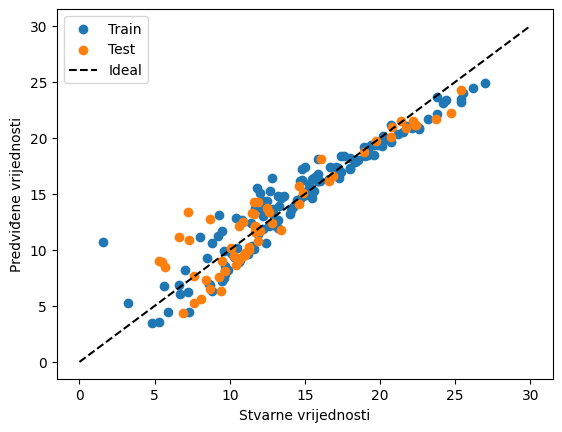

In [ ]:
plt.scatter(y_train, train_predictions, label='Train')
plt.scatter(y_test, test_predictions, label='Test')
plt.plot([0, 30], [0, 30], 'k--', label='Ideal')
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.legend()
plt.show()

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Definiranje modela s polinomijalnim značajkama
degrees = [2, 3, 5, 10]
train_mses = []
test_mses = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    #Na testnim podacima inače ne koristimo fit_transform -- neki razlog
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    train_preds = poly_reg.predict(X_poly_train)
    test_preds = poly_reg.predict(X_poly_test)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")


Degree 2: Train MSE = 0.3541, Test MSE = 0.5232
Degree 3: Train MSE = 0.2198, Test MSE = 0.2908
Degree 5: Train MSE = 0.1498, Test MSE = 46.9662
Degree 10: Train MSE = 0.0248, Test MSE = 253620947145.9207


Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

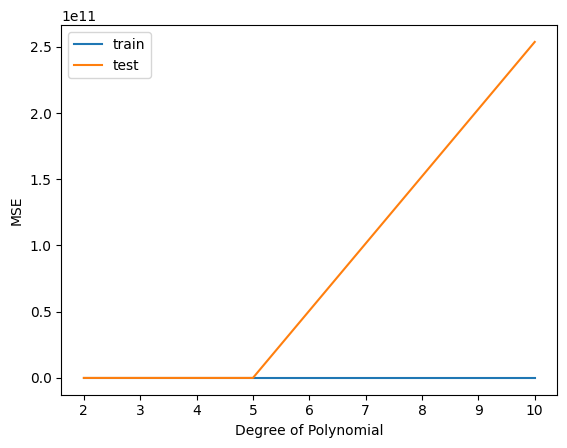

In [ ]:
plt.plot(degrees, train_mses, label='train')
plt.plot(degrees, test_mses, label='test')
plt.legend()
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.show()

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

In [ ]:
train_mses = []
test_mses = []
degrees = [2, 3, 5, 10]
for degree in degrees:
    poly_features = PolynomialFeatures(degree, include_bias=False, interaction_only=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    train_preds = lin_reg.predict(X_poly_train)
    test_preds = lin_reg.predict(X_poly_test)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    print(f"Degree: {degree}, Train MSE: {train_mse}, Test MSE: {test_mse}")

Degree: 2, Train MSE: 0.8476116596934249, Test MSE: 1.007630507076717
Degree: 3, Train MSE: 0.8282466554598642, Test MSE: 1.1532864903359425
Degree: 5, Train MSE: 0.8282466554598642, Test MSE: 1.1532864903359425
Degree: 10, Train MSE: 0.8282466554598642, Test MSE: 1.1532864903359425


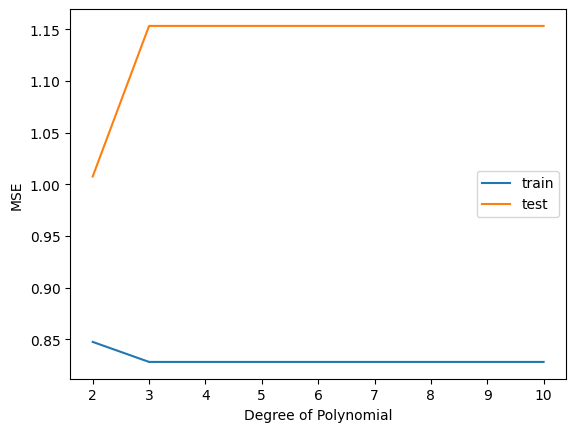

In [ ]:
plt.plot(degrees, train_mses, label='train')
plt.plot(degrees, test_mses, label='test')
plt.legend()
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.show()

Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

In [ ]:
#Polinomijalna regresija - ima bolje performanse na podacima za test dok linearna regresija ima bolje performanse na podacima
#za trening

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

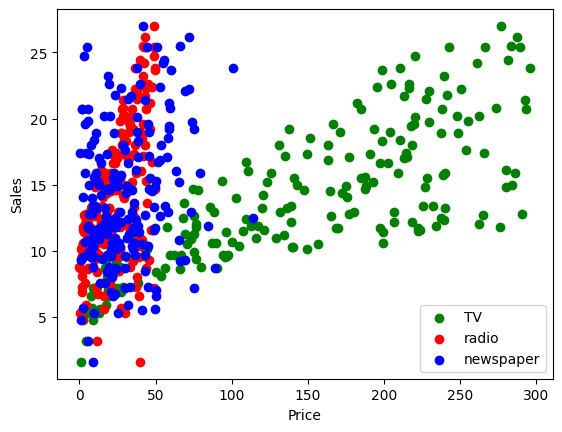

In [ ]:
plt.scatter(data["TV"], data["sales"], c="g",  label="TV")
plt.scatter(data["radio"], data["sales"], c="r", label="radio")
plt.scatter(data["newspaper"], data["sales"], c="b",  label="newspaper")

plt.ylabel("Sales")
plt.xlabel("Price")
plt.legend()
plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

In [ ]:
X_train['TV']=X_train['TV']**(2)
X_train['radio']=X_train['radio']**(2)
X_train['newspaper']=X_train['newspaper']**(3)

X_test['TV']=X_test['TV']**(1/2)
X_test['radio']=X_test['radio']**(1/2)
X_test['newspaper']=X_test['newspaper']**(3)

model_tv = LinearRegression().fit(X_train, y_train)

y_train_pr_tv = model_tv.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_pr_tv))

y_test_pr_tv = model_tv.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_pr_tv))

MSE na treningu:  25.61837923946469
MSE na testu: 29.60048733674826


In [ ]:
data['TV'] = data['TV']**2
#data['TV'] = np.sqrt(data['TV'])
#data['TV'] = np.log(data['TV'], where=data['TV']>0)

#data['radio'] = data['TV']**2
data['radio'] = np.sqrt(data['TV'])
#data['radio'] = np.log(data['TV'], where=data['TV']>0)

#data['newspaper'] = data['TV']**2
#data['newspaper'] = np.sqrt(data['TV'])
data['newspaper'] = np.log(data['TV'], where=data['TV']>0)


Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

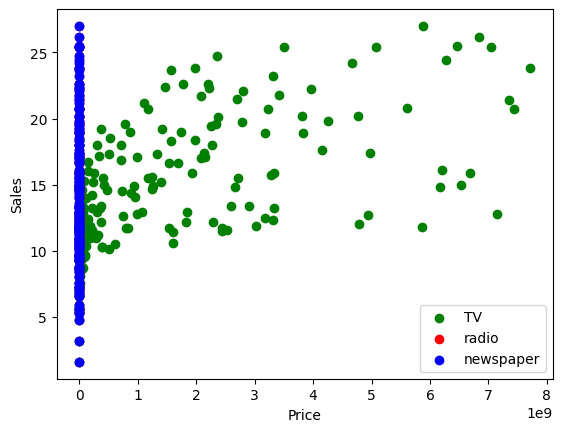

In [ ]:
plt.scatter(data["TV"], data["sales"], c="g",  label="TV")
plt.scatter(data["radio"], data["sales"], c="r", label="radio")
plt.scatter(data["newspaper"], data["sales"], c="b",  label="newspaper")

plt.ylabel("Sales")
plt.xlabel("Price")
plt.legend()
plt.show()

Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# Linearna regresija s L1 regularizacijom (Lasso)
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(random_state=42))
lasso_params = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print("Lasso:")
print("Best params:", lasso_grid.best_params_)
print("Train MSE:", -lasso_grid.best_score_)
print("Test MSE:", -lasso_grid.score(X_test, y_test))
print()

# Linearna regresija s L2 regularizacijom (Ridge)
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(random_state=42))
ridge_params = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print("Ridge:")
print("Best params:", ridge_grid.best_params_)
print("Train MSE:", -ridge_grid.best_score_)
print("Test MSE:", -ridge_grid.score(X_test, y_test))
print()

# Nelinearna regresija s L1 regularizacijom (Lasso)
lasso_pipeline_poly = make_pipeline(PolynomialFeatures(), StandardScaler(), Lasso(random_state=42))
lasso_params_poly = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid_poly = GridSearchCV(lasso_pipeline_poly, lasso_params_poly, cv=5, scoring='neg_mean_squared_error')
lasso_grid_poly.fit(X_poly_train, y_train)
print("Lasso (polynomial):")
print("Best params:", lasso_grid_poly.best_params_)
print("Train MSE:", -lasso_grid_poly.best_score_)
print("Test MSE:", -lasso_grid_poly.score(X_poly_test, y_test))
print()

# Nelinearna regresija s L2 regularizacijom (Ridge)
ridge_pipeline_poly = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge(random_state=42))
ridge_params_poly = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid_poly = GridSearchCV(ridge_pipeline_poly, ridge_params_poly, cv=5, scoring='neg_mean_squared_error')
ridge_grid_poly.fit(X_poly_train, y_train)
print("Ridge (polynomial):")
print("Best params:", ridge_grid_poly.best_params_)
print("Train MSE:", -ridge_grid_poly.best_score_)
print("Test MSE:", -ridge_grid_poly.score(X_poly_test, y_test))


Lasso:
Best params: {'lasso__alpha': 0.1}
Train MSE: 12.586188128569088
Test MSE: 34.04939645191791

Ridge:
Best params: {'ridge__alpha': 0.01}
Train MSE: 7470.293683877293
Test MSE: 34.98362124374909

Lasso (polynomial):
Best params: {'lasso__alpha': 0.01}
Train MSE: 0.4959556800405888
Test MSE: 0.4505996167773413

Ridge (polynomial):
Best params: {'ridge__alpha': 1}
Train MSE: 0.5683939708172024
Test MSE: 0.46864904996351947


Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

In [ ]:
#Možemo vidjeti kako nelinearni modeli imaju niži MSE dok linearni imaju veći. Također možemo vidjeti kako Lasso je postigao najbolje rezultate za alpha = 0.01.
#Za najbolji rezultat kod Ridge modela je postigao alpha=1
#Alfa vrijednost od 0.01 označava relativno nisku jačinu regularizacije za Lasso model.

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

svr_model = SVR()
dt_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()

svr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

svr_preds = svr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
knn_mse = mean_squared_error(y_test, knn_preds)

svr_rmse = sqrt(svr_mse)
dt_rmse = sqrt(dt_mse)
knn_rmse = sqrt(knn_mse)

svr_mae = mean_absolute_error(y_test, svr_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
knn_mae = mean_absolute_error(y_test, knn_preds)

print("SVR model:")
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("MAE:", svr_mae)

print("\nDecision Tree model:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)

print("\nK-Nearest Neighbors model:")
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("MAE:", knn_mae)

SVR model:
MSE: 4.366008914341879
RMSE: 2.089499680388078
MAE: 1.5524121099375257

Decision Tree model:
MSE: 1.7958333333333338
RMSE: 1.3400870618483465
MAE: 1.041666666666667

K-Nearest Neighbors model:
MSE: 2.523600000000001
RMSE: 1.5885842753848476
MAE: 1.178666666666667


In [ ]:
#SVR model ima najgore performanse. A možemo vidjeti da Decision Tree ima najbolje rezultate